

**Research Question:** *Which fur color is most common among squirrels in Central Park?*

The dataset comes from the **2018 Central Park Squirrel Census**.  
It records every squirrel sighting observed in Central Park, New York City, during the census period.  
Each row represents a single squirrel observation, and the dataset includes details such as:  

- **Unique Squirrel ID**
- **Hectare**
- **Shift**
- **Primary Fur Color**
- **Location & Behaviors**
- **Interactions with Humans**

**Dataset URL:** https://data.cityofnewyork.us/resource/vfnx-vebw.csv


## Step 1 — Load the dataset

**Demo:** Tiny **ice cream orders**

In [80]:

# Demo
import pandas as pd

demo_df = pd.DataFrame({
    "flavor": ["Vanilla", "Chocolate", "Strawberry", "Vanilla"],
    "scoops": [1, 2, 1, 3]
})
demo_df.head()


,flavor,scoops
0,Vanilla,1
1,Chocolate,2
2,Strawberry,1
3,Vanilla,3


**Task:** Load the squirrel dataset from the URL into a DataFrame named `df` and preview the first 5 rows.

In [81]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here

import pandas as pd

df = pd.read_csv('https://data.cityofnewyork.us/resource/vfnx-vebw.csv')

df.head()


,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions,geocoded_column
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


## Step 2 — Identify the fur color column

**Demo:** Columns of a **mini movie list**; pick a relevant field (`genre`).

In [82]:

# Demo
mini_movies = pd.DataFrame({
    "title": ["Moonlight", "Arrival", "Dune"],
    "genre": ["Drama", "Sci-Fi", "Sci-Fi"],
    "year": [2016, 2016, 2021]
})
mini_movies.columns


Index(['title', 'genre', 'year'], dtype='object')

**Task:** List all columns of `df` and locate the fur color column (commonly `primary_fur_color`).

In [83]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here

print(df.columns.tolist())

df.primary_fur_color.head(15)




['x', 'y', 'unique_squirrel_id', 'hectare', 'shift', 'date', 'hectare_squirrel_number', 'age', 'primary_fur_color', 'highlight_fur_color', 'combination_of_primary_and', 'color_notes', 'location', 'above_ground_sighter', 'specific_location', 'running', 'chasing', 'climbing', 'eating', 'foraging', 'other_activities', 'kuks', 'quaas', 'moans', 'tail_flags', 'tail_twitches', 'approaches', 'indifferent', 'runs_from', 'other_interactions', 'geocoded_column']


0          NaN
1          NaN
2         Gray
3         Gray
4         Gray
5     Cinnamon
6         Gray
7         Gray
8         Gray
9         Gray
10        Gray
11        Gray
12        Gray
13    Cinnamon
14        Gray
Name: primary_fur_color, dtype: object

## Step 3 — Clean the data

**Demo:** Clean messy **city names** (strip/case).

In [84]:

# Demo
import pandas as pd

# Tiny example with null values
data = {
    "Name": ["Alice", "Bob", "Charlie", None],
    "Age": [25, None, 30, 22]
}
demo_df = pd.DataFrame(data)

# Check for null values
print(demo_df.isnull().sum())



Name    1
Age     1
dtype: int64



**Task:** Standardize `primary_fur_color`:
- Convert to string
- Strip spaces
- Title case  
- Then show top 10 with `.value_counts()`.



In [85]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here


df['primary_fur_color'] = (df['primary_fur_color'].astype(str).str.strip().str.title())


print("Top 10:", df['primary_fur_color'].value_counts().head(10))




Top 10: primary_fur_color
Gray        825
Cinnamon    126
Black        34
Nan          15
Name: count, dtype: int64


## Step 4 — Count the fur colors

**Demo:** Count **pizza toppings**.

In [86]:

# Demo
orders = pd.DataFrame({
    "topping": ["Mushroom", "Pepperoni", "Mushroom", "Olives", "Pepperoni", "Pepperoni"]
})
topping_counts = orders["topping"].value_counts()
topping_counts


topping
Pepperoni    3
Mushroom     2
Olives       1
Name: count, dtype: int64

**Task:** Compute `fur_counts = df['primary_fur_color'].value_counts()` and identify the most common color.

In [ ]:
#TODO: Your task with the squirrel dataset!
#Please provide you code here

df['primary_fur_color'].value_counts()

# most common color among these squirrels is gray.

primary_fur_color
Gray        825
Cinnamon    126
Black        34
Nan          15
Name: count, dtype: int64

## Step 5 — Visualize the results (Bar + Pie)

**Demo:** Bar chart for **coffee drinks**; then a pie chart to show proportions.

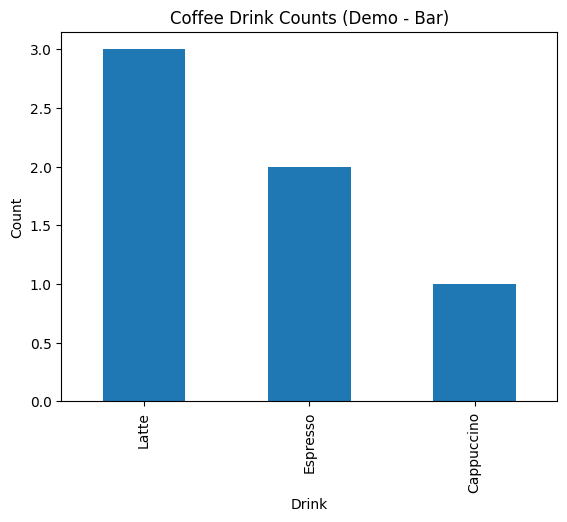

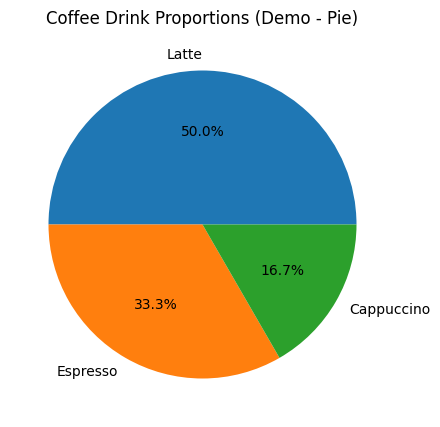

In [89]:

# Demo (bar + pie)
import matplotlib.pyplot as plt

coffee = pd.DataFrame({
    "drink": ["Latte", "Espresso", "Latte", "Cappuccino", "Latte", "Espresso"],
})
coffee_counts = coffee["drink"].value_counts()

# Bar
coffee_counts.plot(kind='bar')
plt.title("Coffee Drink Counts (Demo - Bar)")
plt.xlabel("Drink")
plt.ylabel("Count")
plt.show()

# Pie
coffee_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title("Coffee Drink Proportions (Demo - Pie)")
plt.ylabel("")
plt.show()



**Task:** Plot both a **bar chart** and a **pie chart** using `fur_counts`.
- Title and label the bar chart appropriately.
- Add percentages to the pie chart.


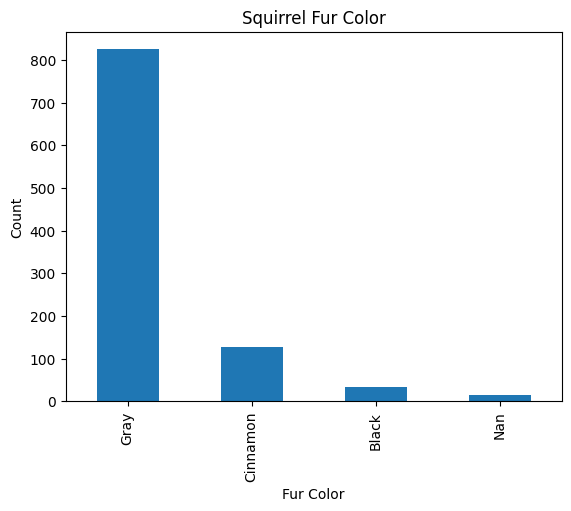

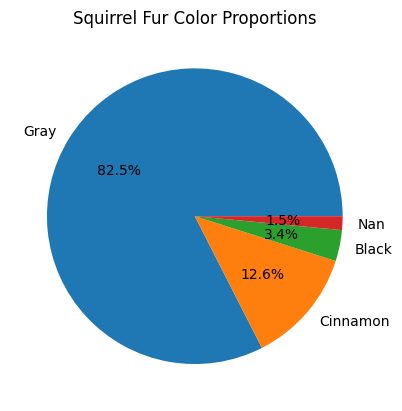

In [90]:

#TODO: Your task with the squirrel dataset!
#Please provide you code here

# assigning fur counts variable based on specific value counts of each fur color 

fur_counts = df['primary_fur_color'].value_counts()


# bar chart


fur_counts.plot(kind="bar")
plt.title('Squirrel Fur Color')
plt.xlabel('Fur Color')
plt.ylabel('Count')
plt.show()

# pie chart

fur_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Squirrel Fur Color Proportions')
plt.ylabel("")
plt.show()

## Step 6 — Interpret the results


**Task:** Write 3–5 sentences:
- Which fur color is most common?
- Are there close runners-up?
- What could explain the distribution?


### Gray is the most common fur color, with frequency counts going up to 825 (82.5%). None of the runner-ups came close to this amount, as cinnamon colored squirrels were stuck at a number of 126, and black colored squirrels were stuck at a number of 34 in total. The rest of the 15 entries stemmed from cells that were considered to be empty or missing when it came to primary fur coloring in the original dataset. However, this distribution makes sense, as the Eastern Gray Squirrel is the most common type of squirrel that exists in North America, so it is bound to be observed or recorded more often. 

## Independent Research Question  

**Research Question:**  
*Where are squirrels most spotted in Central Park? And why?*  

**Things to consider:**
- Are there any missing or malformed values in the `hectare` column?  
- Should you inspect/clean/standardize the hectare codes before counting?  
- Do some hectares naturally have more observations because...?
- Which visualization works best to your audience?

### Guidance (light touch, not step-by-step):  
- Use the `hectare` column, a grid ID that divides the park into rows A–I and columns 1–42.  
- Count how many squirrels were observed in each hectare.  
- Consider visualizing the results.   
- Write a short interpretation: Where are the hotspots? Why might those areas have more sightings?  

### Dataset Details: NYC OpenData
https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw/about_data


Unique hectare codes: 306
Sample hectare values:
0    37F
1    21B
2    11B
3    32E
4    13E
5    11H
6    36H
7    33F
8    21C
9    11D
Name: hectare, dtype: object
Top 10 hectare hotspots:
  Hectare  Squirrel_count
0     36I              14
1     14E              14
2     13E              11
3     07H              10
4     32E              10
5     14D              10
6     10G              10
7     06A               9
8     03B               9
9     22F               9

Total hectares with observations/squirrels: 306
Average squirrels per hectare: 3


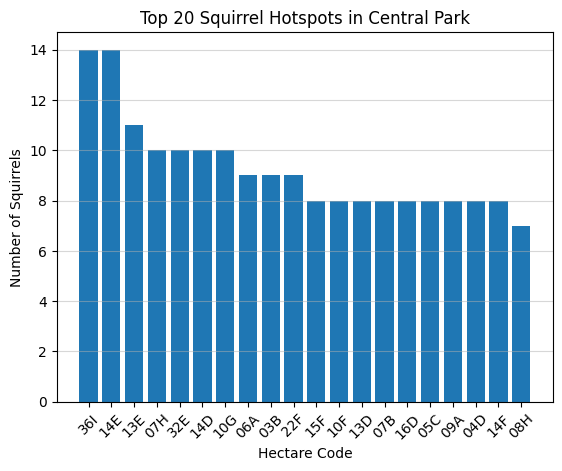

In [92]:
# Indepdendent Research Question:

import matplotlib.pyplot as plt


print(f"Unique hectare codes: {df['hectare'].nunique()}")
print("Sample hectare values:")
print(df['hectare'].head(10))

# Convert to string and check the format
df['hectare'] = df['hectare'].astype(str).str.strip()

# counting squirrels per hectare
hectare_counts = df['hectare'].value_counts().reset_index() # converting to data frame to account for index (hectare) and value (count) --> value_counts() returns series 
hectare_counts.columns = ['Hectare', 'Squirrel_count'] # column names for reference
print(f"Top 10 hectare hotspots:")
print(hectare_counts.head(10))

print(f"\nTotal hectares with observations/squirrels: {len(hectare_counts)}")
print(f"Average squirrels per hectare: {hectare_counts['Squirrel_count'].mean():.0f}")

# top 20 hectares bar chart
top_hectares = hectare_counts.head(20)
plt.bar(top_hectares['Hectare'], top_hectares['Squirrel_count'])
plt.title('Top 20 Squirrel Hotspots in Central Park')
plt.xlabel('Hectare Code')
plt.ylabel('Number of Squirrels')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()




# Interpretation of Results:

### The top 5 houtspots for the squirrels appread to be 36I, 14E, 13E, 07H, and 32E based on extensive observation and visualization that I was able to conduct utilizing the dataset. On the surface, these areas might be particularly susceptible to more squirrel sightings due to their proximity to areas with alot of people or activity that the animals gravitate towards. Here, squirrels have a higher chance to run into individuals that might feed them, or trees that may provide solace for them. Furthermore, there is a higher chance for humans to spot them and record their presence in this dataset if there are more people generally walking around these areas to spot them on a more consistent basis. If the time of day is right, and the weather conditions allow these things to take place, then it might be very reasonable to say that these are major reasons behind why squirrel sightings show up so much in these places.